In [29]:
%matplotlib inline

In [142]:
import pandas as pd
import natsort as na
import matplotlib.pyplot as plt

In [9]:
chrom_size = pd.read_csv("https://hgdownload.cse.ucsc.edu/goldenPath/hg19/bigZips/hg19.chrom.sizes", sep="\t", names=["chrom", "size"])

In [5]:
df = pd.read_csv("/Users/nkrumm/Desktop/HRD_snps.bed", sep="\t", names=["chrom", "start", "end", "rsid"])

In [18]:
chrom_size = chrom_size.head(24)
chrom_size["chrom"] = chrom_size["chrom"].str.replace("chr", "")

In [6]:
df.head()

,chrom,start,end,rsid
0,1,798959,798959,rs11240777
1,1,3736319,3736319,rs9424303
2,1,6195732,6195732,rs9435080
3,1,7420904,7420904,rs705672
4,1,8767311,8767311,rs10864363


In [44]:
counts = df.groupby("chrom").count()["rsid"]
counts = pd.merge(counts, chrom_size.set_index("chrom"), left_index=True, right_index=True)

In [46]:
counts = counts.reindex(index=na.natsorted(counts.index))

In [47]:
counts["density"] = counts.rsid/counts["size"]

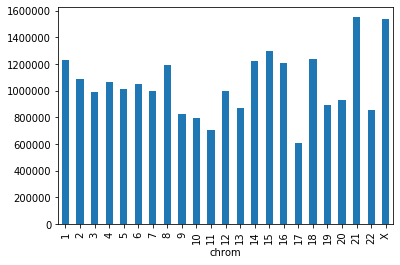

In [120]:
(1./counts.density).plot(kind='bar')


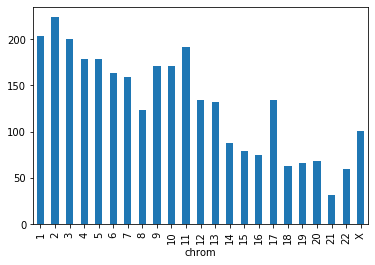

In [49]:
counts.rsid.plot(kind='bar')

## Validation of snps

I used https://www.snp-nexus.org/ to re-annotate from the RSID

In [50]:
annot = pd.read_csv("/Users/nkrumm/Downloads/gen_coords_92237674.txt", sep="\t")

In [163]:
annot.head()

,Variation ID,dbSNP,Chromosome,Position,REF Allele,ALT Allele (IUPAC),Minor Allele,Minor Allele Global Frequency,Contig,Contig Position,Band
0,rs11240777,rs11240777,1,798959,G,A,A,0.409944,GL000003.1,277591,p36.33
1,rs9424303,rs9424303,1,3736319,A,G,A,0.309704,GL000003.1,3214951,p36.32
2,rs9435080,rs9435080,1,6195732,C,R,C,0.489816,GL000004.1,2200464,p36.31
3,rs705672,rs705672,1,7420904,C,T,C,0.487220,GL000004.1,3425636,p36.23
4,rs10864363,rs10864363,1,8767311,T,G,G,0.315695,GL000004.1,4772043,p36.23


In [85]:
m = pd.merge(annot, df, left_on="Variation ID", right_on="rsid")
assert (m.Position != m.start).sum() == 0

In [90]:
m["MAF"] = pd.to_numeric(annot["Minor Allele Global Frequency"], errors='coerce')

In [86]:
m.head()

,Variation ID,dbSNP,Chromosome,Position,REF Allele,ALT Allele (IUPAC),Minor Allele,Minor Allele Global Frequency,Contig,Contig Position,Band,chrom,start,end,rsid
0,rs11240777,rs11240777,1,798959,G,A,A,0.409944,GL000003.1,277591,p36.33,1,798959,798959,rs11240777
1,rs9424303,rs9424303,1,3736319,A,G,A,0.309704,GL000003.1,3214951,p36.32,1,3736319,3736319,rs9424303
2,rs9435080,rs9435080,1,6195732,C,R,C,0.489816,GL000004.1,2200464,p36.31,1,6195732,6195732,rs9435080
3,rs705672,rs705672,1,7420904,C,T,C,0.487220,GL000004.1,3425636,p36.23,1,7420904,7420904,rs705672
4,rs10864363,rs10864363,1,8767311,T,G,G,0.315695,GL000004.1,4772043,p36.23,1,8767311,8767311,rs10864363


In [83]:
m["Minor Allele"].value_counts()

A       764
T       748
G       720
C       714
None     18
Name: Minor Allele, dtype: int64

In [84]:
m["ALT Allele (IUPAC)"].value_counts()

G    614
T    593
C    564
A    561
M    158
K    131
W    124
R     57
S     52
Y     47
H     29
D     18
B     10
V      6
Name: ALT Allele (IUPAC), dtype: int64

In [82]:
m["REF Allele"].value_counts()

C    797
G    750
A    740
T    677
Name: REF Allele, dtype: int64

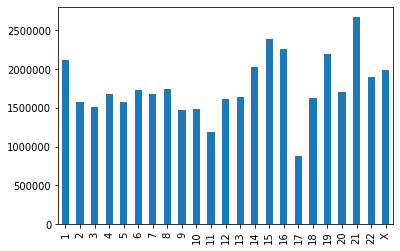

In [119]:
t = m[m["MAF"] > 0.3].Chromosome.value_counts()
t = pd.merge(t, chrom_size.set_index("chrom"), left_index=True, right_index=True)
t = t.reindex(index=na.natsorted(t.index))
t["density"] = t.Chromosome/t["size"]
(1./t.density).plot(kind='bar')

### MAF

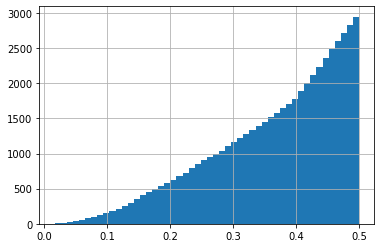

In [138]:
pd.to_numeric(annot["Minor Allele Global Frequency"], errors='coerce').hist(bins=50, cumulative=True)

Text(0.5, 1.0, 'HRD')

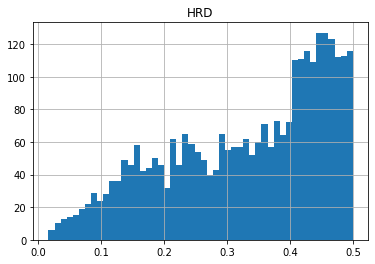

In [145]:
pd.to_numeric(annot["Minor Allele Global Frequency"], errors='coerce').hist(bins=50)
plt.title("HRD")

## IDT

In [122]:
idt = pd.read_csv("/Users/nkrumm/Downloads/gen_coords_cbc5b7f0.txt", sep="\t")

In [154]:
idt.shape

(8858, 12)

In [157]:
idt["Minor Allele"].apply(lambda x: len(x)).value_counts()

1     8656
2       59
4       58
3       36
5        8
6        7
8        5
7        5
12       4
9        4
17       3
21       2
10       2
22       1
27       1
15       1
26       1
18       1
30       1
33       1
25       1
23       1
Name: Minor Allele, dtype: int64

In [123]:
idt["MAF"] = pd.to_numeric(idt["Minor Allele Global Frequency"], errors='coerce')

Text(0.5, 1.0, 'IDT')

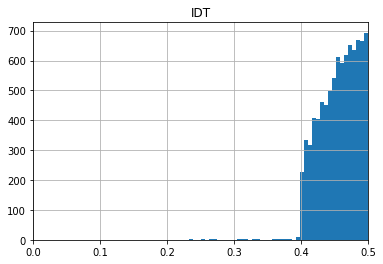

In [144]:
idt.MAF.hist(bins=50)
plt.xlim([0,0.5])
plt.title("IDT")

In [127]:
probes = pd.read_csv("/Users/nkrumm/Downloads/xgen_cnv_backbone_panel_probes.bed", sep="\t", names=["chrom", "start", "end", "name"])

In [128]:
probes.head()

,chrom,start,end,name
0,chr1,565346,565466,chr1_p36.33_001_rs6594029
1,chr1,985390,985510,chr1_p36.33_002_rs397834473
2,chr1,1660666,1660786,chr1_p36.33_003_rs1061884
3,chr1,2036203,2036323,chr1_p36.33_004_rs10797413
4,chr1,2327755,2327875,chr1_p36.32_001_rs2840532


In [129]:
probes["size"] = probes.end - probes.start

In [134]:
probes["size"].sum()

1093519

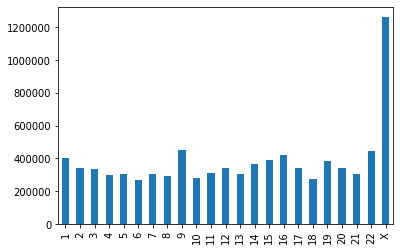

In [162]:
t = idt.Chromosome.value_counts()
t = pd.merge(t, chrom_size.set_index("chrom"), left_index=True, right_index=True)
t = t.reindex(index=na.natsorted(t.index))
t["density"] = t.Chromosome/t["size"]
t = t[t.index != 'Y']
(1./t.density).plot(kind='bar')

Questions for IDT

    - What is the design of the CNV probes from IDT? Specially balanced or just a random subset?
    - Why is X not as densly tiled?
    - Can we tune the concentrations of the CNV probe pool?
    - Pricing? Can we be beta testers?
    - If we design our own, what is the IDT pooling strategy-- can we specify what SNPs go into which pools?
    
Questions for Steve:

    - Why do some of the SNPs have such low MAF?
    - Do we need the targeted snps? (no?)